# Project Name: Bank Customer Churn Prediction using H2O Auto ML

 
### 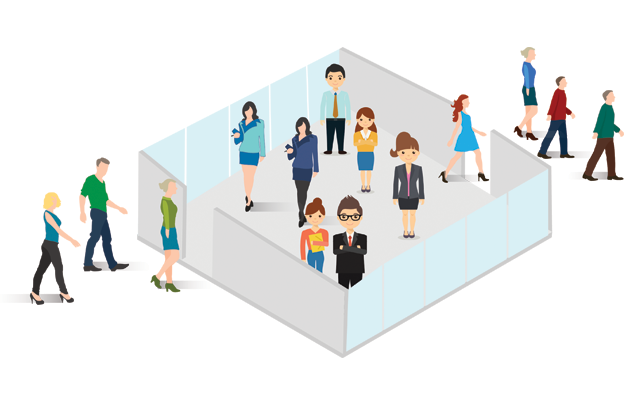

## Context: 
### In general, churn is expressed as a degree of customer inactivity or disengagement, observed over a given time. This manifests within the data in various forms such as the recency of account actions or change in the account balance

## Aim:
### We aim to accomplish the following for this study:

- Identify and visualize which factors contribute to customer churn.

### Build a prediction model that will perform the following:

- Classify if a customer is going to churn or not
- Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn.

## Aim:
### We aim to accomplish the following for this study:

- Identify and visualize which factors contribute to customer churn.

### Build a prediction model that will perform the following:

- Classify if a customer is going to churn or not
- Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn.

## Time Line of the Project:
- Data Analysis
- Feature Engineering
- Model Building using ANN 
- Model Building and Prediction using H2O Auto ML

In [1]:
import os
os.getcwd() 

'C:\\Users\\adity'

In [2]:
os.chdir("E:\\minor_project")

In [3]:
os.getcwd()

'E:\\minor_project'

In [4]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [5]:
df=pd.read_csv('Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
df.count()

RowNumber          10000
CustomerId         10000
Surname            10000
CreditScore        10000
Geography          10000
Gender             10000
Age                10000
Tenure             10000
Balance            10000
NumOfProducts      10000
HasCrCard          10000
IsActiveMember     10000
EstimatedSalary    10000
Exited             10000
dtype: int64

In [8]:
df.drop(['CustomerId','RowNumber','Surname'],axis='columns',inplace=True)

In [9]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
data_types=df.dtypes
print(data_types)

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object


# Data Analysis

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
unique_values=df.nunique()
print(unique_values)

CreditScore         460
Geography             3
Gender                2
Age                  70
Tenure               11
Balance            6382
NumOfProducts         4
HasCrCard             2
IsActiveMember        2
EstimatedSalary    9999
Exited                2
dtype: int64


In [13]:
info_df = pd.DataFrame({'Unique Values': unique_values, 'Data Type': data_types})
print(info_df)


                 Unique Values Data Type
CreditScore                460     int64
Geography                    3    object
Gender                       2    object
Age                         70     int64
Tenure                      11     int64
Balance                   6382   float64
NumOfProducts                4     int64
HasCrCard                    2     int64
IsActiveMember               2     int64
EstimatedSalary           9999   float64
Exited                       2     int64


## EDA

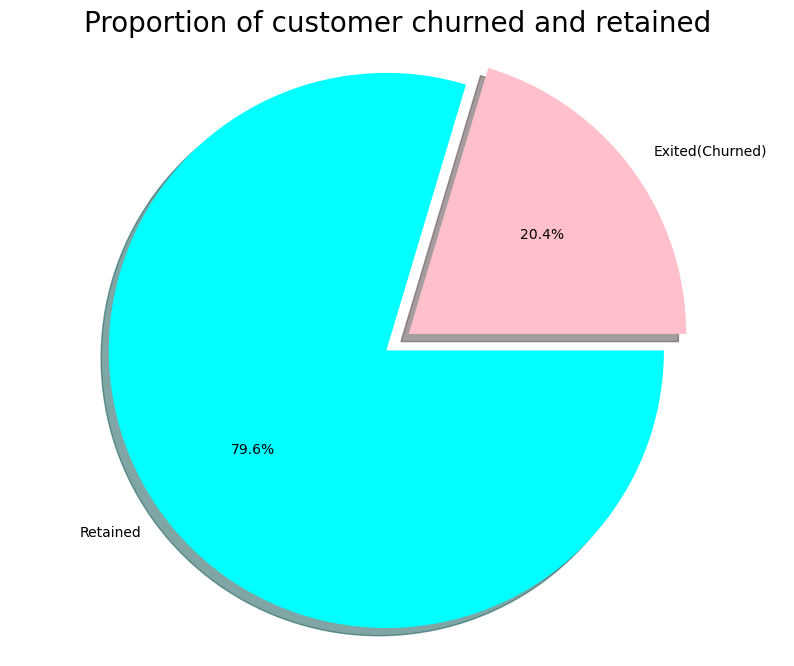

In [14]:
labels = 'Exited(Churned)', 'Retained'
sizes = [df.Exited[df['Exited']==1].count(), df.Exited[df['Exited']==0].count()]
explode = (0, 0.1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode,colors={"cyan","pink"}, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=360)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [15]:
import seaborn as sns

### Reviewing the 'Status' relation with categorical variables

<Axes: xlabel='IsActiveMember', ylabel='count'>

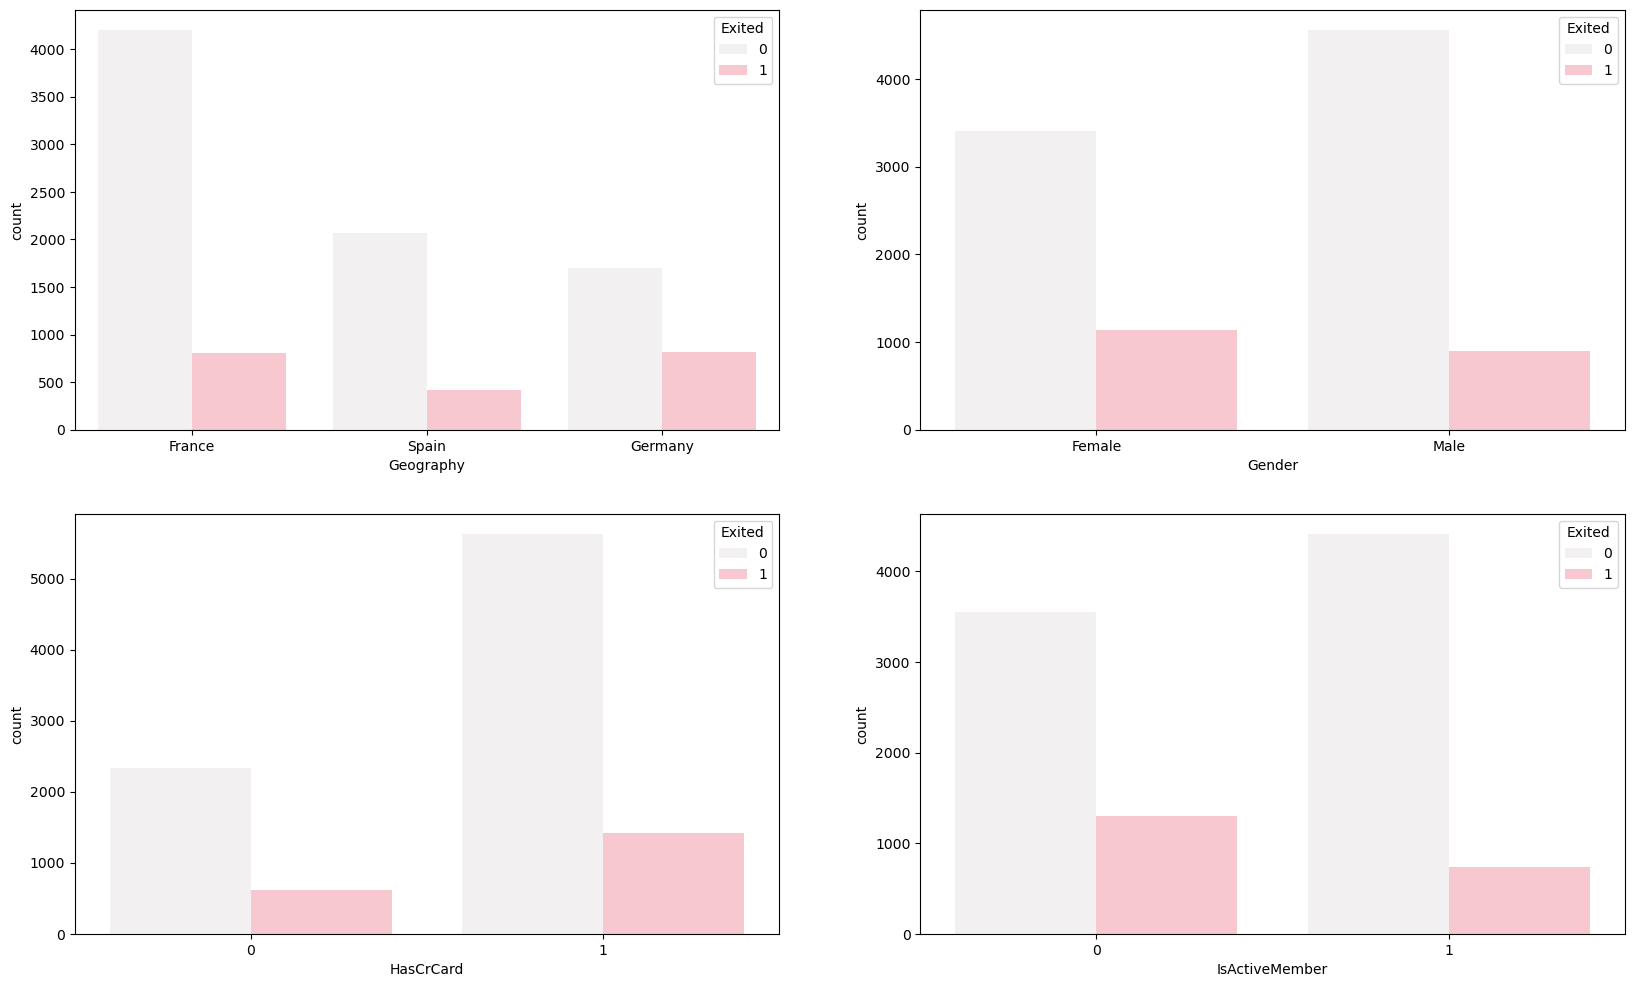

In [16]:
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',color="pink",data = df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',color="pink",data = df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',color="pink",data = df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',color="pink",data = df, ax=axarr[1][1])

<Axes: xlabel='Exited', ylabel='EstimatedSalary'>

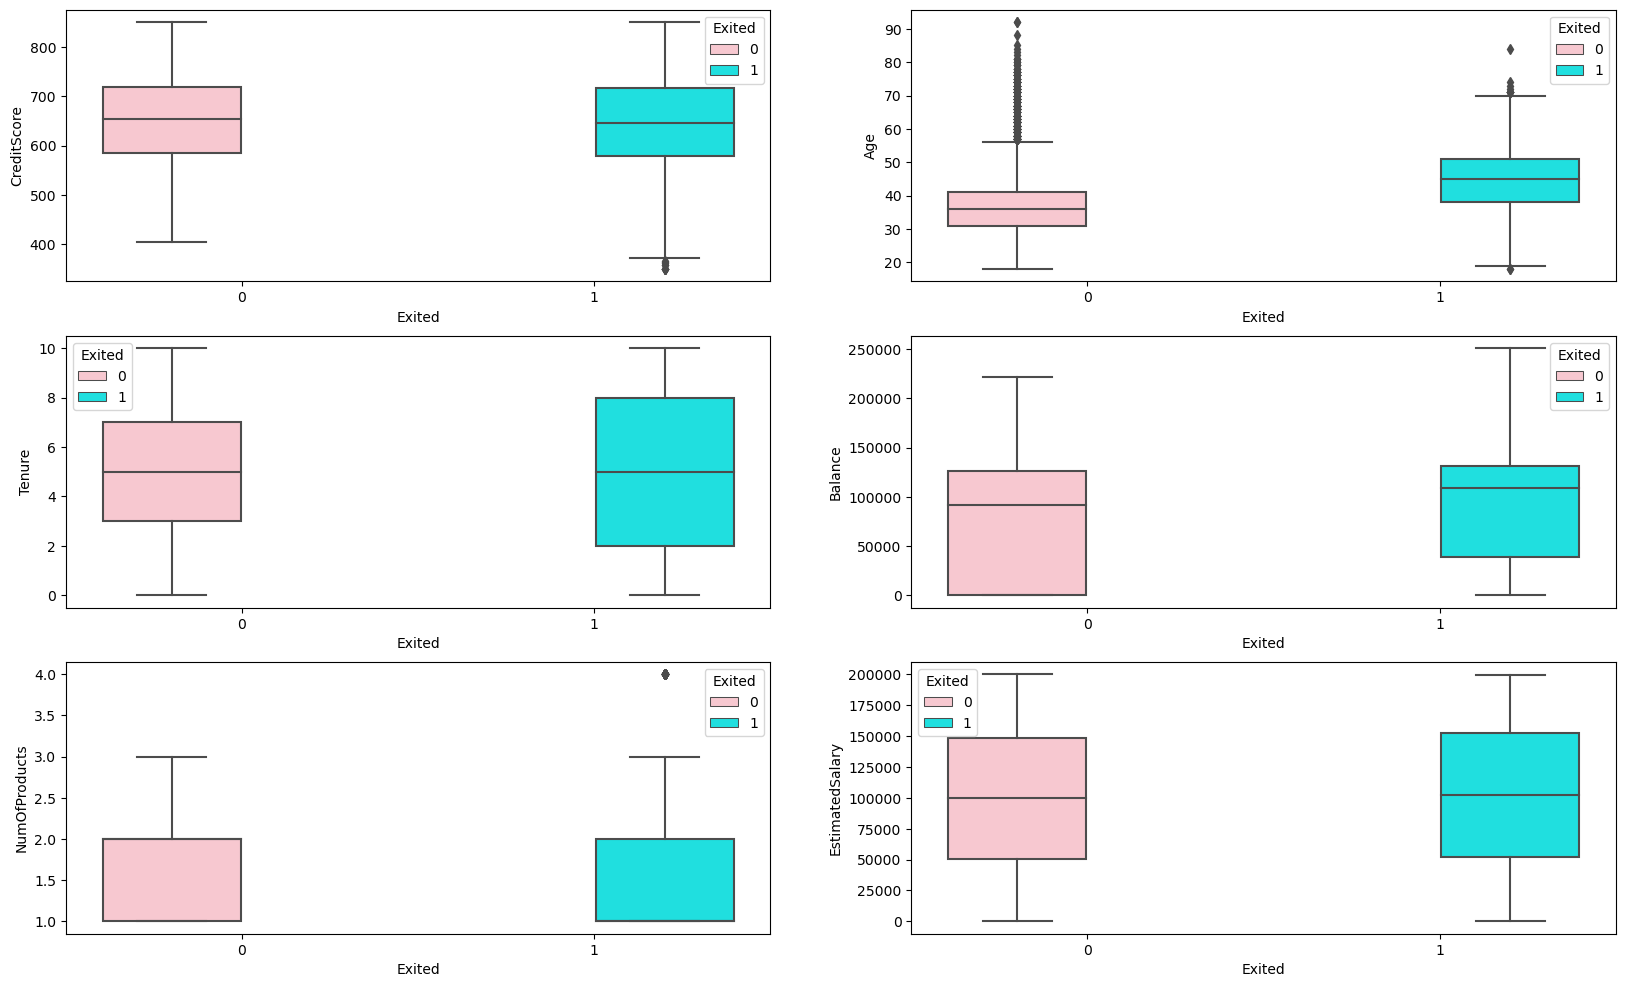

In [17]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
colors= ["pink", "cyan"]
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited', data = df, ax=axarr[0][0], palette=colors)
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = df , ax=axarr[0][1], palette=colors)
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][0], palette=colors)
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = df, ax=axarr[1][1], palette=colors)
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][0], palette=colors)
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = df, ax=axarr[2][1], palette=colors)

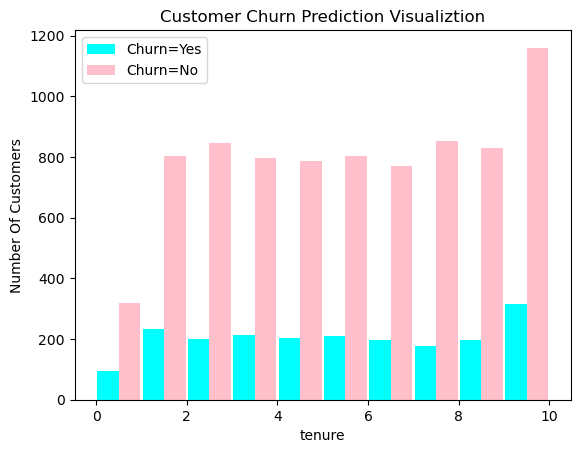

In [18]:
tenure_churn_no = df[df.Exited==0].Tenure
tenure_churn_yes = df[df.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['cyan','pink'],label=['Churn=Yes','Churn=No'])
plt.legend()

<Axes: xlabel='Age'>

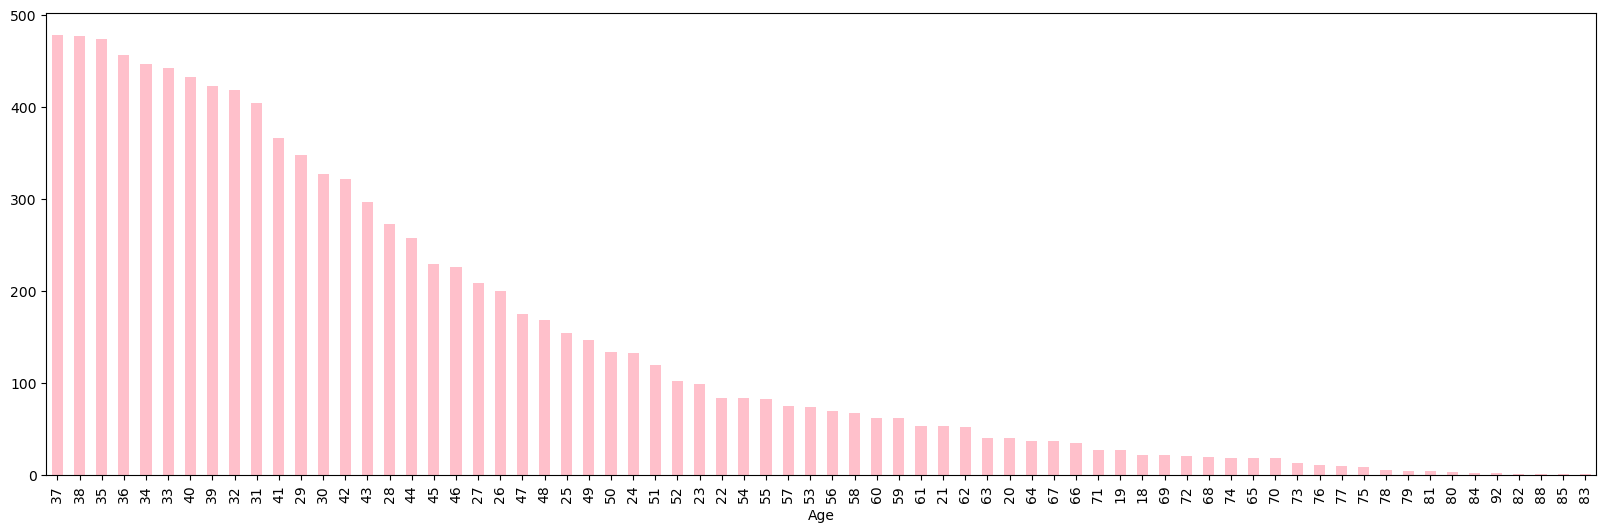

In [19]:
df["Age"].value_counts().plot.bar(figsize=(20,6), color=["pink"])

## Feature Engineering

### Making a new column BalanceSalaryRatio

In [20]:
# df['BalanceSalaryRatio'] = df.Balance/df.EstimatedSalary
# colors = ["pink", "cyan"]
# sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = df, palette=colors)
# plt.ylim(-1, 5)

In [21]:
# df['TenureByAge'] = df.Tenure/(df.Age)
# sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = df, palette=colors)
# colors = ['pink', 'cyan']
# plt.ylim(-1, 1)
# plt.show()

#### Printing the categorical variables

In [22]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}')

In [23]:
print_unique_col_values(df)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


### Label Encoding

In [24]:
df['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

### One Hot Encoding method

In [25]:
df1 = pd.get_dummies(data=df, columns=['Geography'])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,True,False,False
1,608,0,41,1,83807.86,1,0,1,112542.58,0,False,False,True
2,502,0,42,8,159660.80,3,1,0,113931.57,1,True,False,False
3,699,0,39,1,0.00,2,0,0,93826.63,0,True,False,False
4,850,0,43,2,125510.82,1,1,1,79084.10,0,False,False,True


### Scaling

In [26]:
scale_var = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[scale_var] = scaler.fit_transform(df1[scale_var])

In [27]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,True,False,False
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,False,False,True
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,True,False,False
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,True,False,False
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,False,False,True


In [28]:
X = df1.drop('Exited',axis='columns')  ##independent features
y = df1['Exited']                      ##dependent 
 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [29]:
from collections import Counter
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

counter = Counter(y_train)
c2=Counter(y_test)
print('count',counter)
print(c2)

X_train shape: (8000, 12)
y_train shape: (8000,)
count Counter({0: 6368, 1: 1632})
Counter({0: 1595, 1: 405})


## Model Building and Prediction

## The Sequential model

### A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor.

## A Sequential model is not appropriate when:

-Your model has multiple inputs or multiple outputs
-Any of your layers has multiple inputs or multiple outputs
-You need to do layer sharing
-You want non-linear topology (e.g. a residual connection, a multi-branch model)

In [30]:
print("X_train data type:", X_train.dtype)
print("y_train data type:", y_train.dtype)


X_train data type: object
y_train data type: int64


In [31]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')
print("X_train data type:", X_train.dtype)
print("y_train data type:", y_train.dtype)

X_train data type: float32
y_train data type: float32


In [32]:
#random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, f1_score,average_precision_score, confusion_matrix,
                             average_precision_score, precision_score, recall_score, roc_auc_score, )
from sklearn.metrics import confusion_matrix , classification_report
clf = RandomForestClassifier(n_estimators = 200, random_state=200)
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)


0.86

In [33]:
report = classification_report(y_test, pred)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.96      0.92      1595
         1.0       0.76      0.45      0.57       405

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



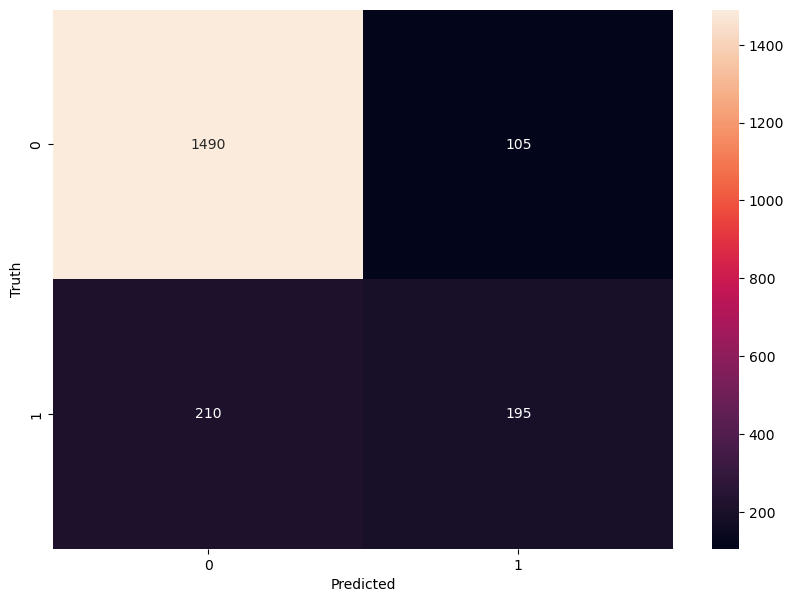

In [57]:
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [42]:
#XGBoost
from xgboost import XGBClassifier, plot_importance
clf  = XGBClassifier(max_depth = 10,random_state = 10, n_estimators=220, eval_metric = 'auc', min_child_weight = 3,
                    colsample_bytree = 0.75, subsample= 0.9)

clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(pred, y_test)


0.838

Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.94      0.90      1595
         1.0       0.64      0.45      0.53       405

    accuracy                           0.84      2000
   macro avg       0.76      0.69      0.72      2000
weighted avg       0.82      0.84      0.83      2000



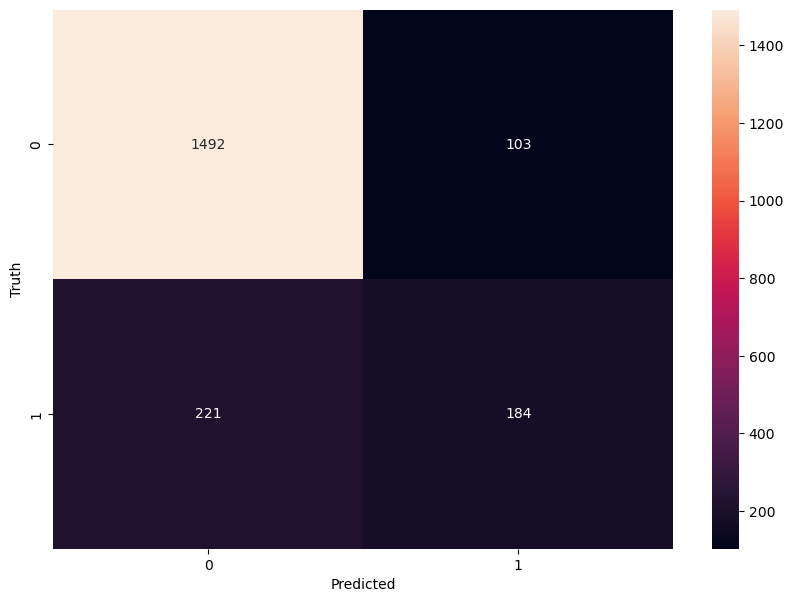

In [43]:
# Generate classification report
report = classification_report(y_test, pred)
print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()


In [44]:
# create a svm Classifier
from sklearn import svm
from sklearn import metrics
svc = svm.SVC(kernel='linear') # linear kernel

# train the model using train dataset
svc.fit(X_train, y_train)

# predict the churn for test dataset
y_pred = svc.predict(X_test)
svc_acc = metrics.accuracy_score(y_test, y_pred)
print("Accuracy Train:", metrics.accuracy_score(y_train, svc.predict(X_train)))
print("Accuracy Test:", svc_acc)

Accuracy Train: 0.796
Accuracy Test: 0.7975


Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89      1595
         1.0       0.00      0.00      0.00       405

    accuracy                           0.80      2000
   macro avg       0.40      0.50      0.44      2000
weighted avg       0.64      0.80      0.71      2000



C:\Users\adity\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\adity\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


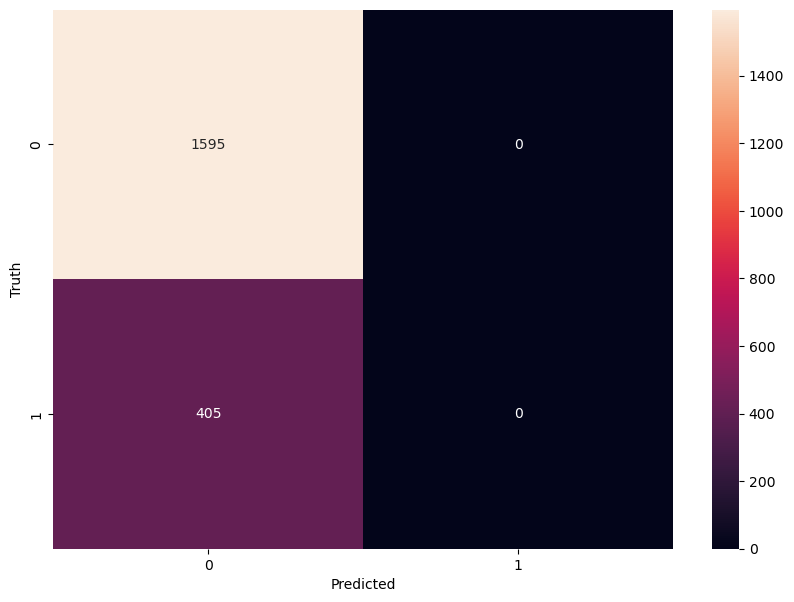

In [63]:
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [35]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(25, input_shape=(12,), activation='relu'),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy']) 
model.fit(X_train, y_train,epochs=100,batch_size=16)

Epoch 1/100
500/500 [==============================] - 2s 2ms/step - loss: 0.5414 - accuracy: 0.7450
Epoch 2/100
500/500 [==============================] - 1s 2ms/step - loss: 0.4436 - accuracy: 0.8085
Epoch 3/100
500/500 [==============================] - 1s 2ms/step - loss: 0.4083 - accuracy: 0.8253
Epoch 4/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3831 - accuracy: 0.8393
Epoch 5/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3673 - accuracy: 0.8482
Epoch 6/100
500/500 [==============================] - 1s 3ms/step - loss: 0.3609 - accuracy: 0.8505
Epoch 7/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3582 - accuracy: 0.8501
Epoch 8/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3543 - accuracy: 0.8537
Epoch 9/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3536 - accuracy: 0.8520
Epoch 10/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3507 - accura

500/500 [==============================] - 1s 2ms/step - loss: 0.3242 - accuracy: 0.8656
Epoch 82/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3234 - accuracy: 0.8677
Epoch 83/100
500/500 [==============================] - 1s 1ms/step - loss: 0.3235 - accuracy: 0.8674
Epoch 84/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3234 - accuracy: 0.8674
Epoch 85/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3226 - accuracy: 0.8664
Epoch 86/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3231 - accuracy: 0.8661
Epoch 87/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3222 - accuracy: 0.8679
Epoch 88/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3233 - accuracy: 0.8659
Epoch 89/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3219 - accuracy: 0.8670
Epoch 90/100
500/500 [==============================] - 1s 2ms/step - loss: 0.3217 - accuracy: 

In [36]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3622 - accuracy: 0.8470


[0.3622392416000366, 0.847000002861023]

In [37]:
yp = model.predict(X_test)
yp

63/63 [==============================] - 0s 2ms/step


array([[0.01710448],
       [0.07128263],
       [0.02172551],
       ...,
       [0.02063978],
       [0.02495274],
       [0.07321548]], dtype=float32)

### Converting our predictions to 0,1 to check accuracy

In [38]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [39]:
y_pred  

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


### Checking the accuracy 

In [40]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.94      0.91      1595
         1.0       0.68      0.46      0.55       405

    accuracy                           0.85      2000
   macro avg       0.78      0.70      0.73      2000
weighted avg       0.83      0.85      0.84      2000



Text(95.72222222222221, 0.5, 'Truth')

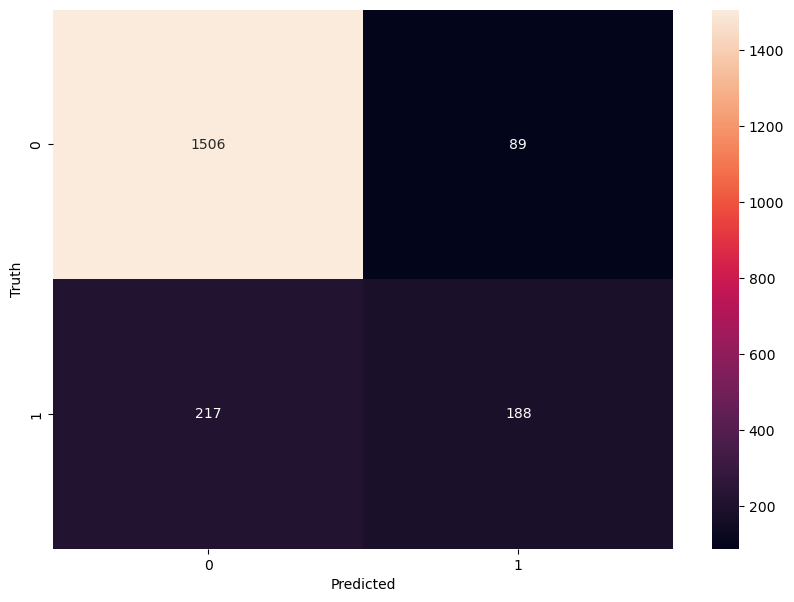

In [41]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [77]:
from sklearn.metrics import accuracy_score


In [45]:
print("Accuracy score is: ", accuracy_score(y_test,y_pred)*100,"%")

Accuracy score is:  85.45 %
